In [ ]:
!pip install tensorflow==2.12

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Un

In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip


--2024-11-03 18:34:42--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.136.21, 52.216.113.101, 52.217.113.144, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.136.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  57.0MB/s    in 0.2s    

2024-11-03 18:34:42 (57.0 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


Examining the contents of the Jena weather dataset reveals 420,451 rows and 15
attributes.

In [ ]:
import os
fL_Nme = os.path.join("jena_climate_2009_2016.csv")
with open(fL_Nme) as f:
    dataCon = f.read()
Row_l = dataCon.split("\n")
header = Row_l[0].split(",")
Col_nme = Row_l[1:]
print(header)
print(len(Row_l))
_var_num = len(header)
print("Number of variables:", _var_num)
row_num = len(Row_l)
print("Number of rows:", row_num)


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420452
Number of variables: 15
Number of rows: 420452


The process of parsing the data entails converting the numbers separated by commas into floating point integers. The raw_data and temperature arrays then include specific values that can be processed or analyzed later.


In [ ]:
import numpy as np
_tmp = np.zeros((len(Row_l),))
_data_rw = np.zeros((len(Row_l), len(header) - 1))
for i, line in enumerate(Col_nme):
    vals = [float(x) for x in line.split(",")[1:]]
    _tmp[i] = vals[1]
    _data_rw[i, :] = vals[:]


Making a graphical representation of the temperature timeseries.


Text(0, 0.5, 'Temperature')

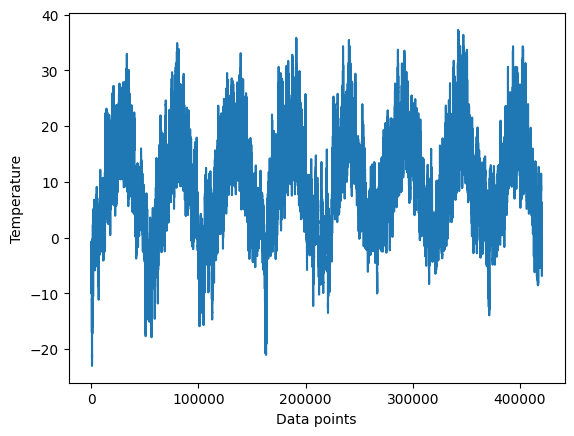

In [ ]:
from matplotlib import pyplot as pl
pl.plot(range(len(_tmp)), _tmp)
pl.xlabel('Data points')
pl.ylabel('Temperature')


Generating a temperature timeseries plot for the first 10 days, with 144 data points every day for a total of 1440 points for the chosen timeframe.



Text(0, 0.5, 'Temperature')

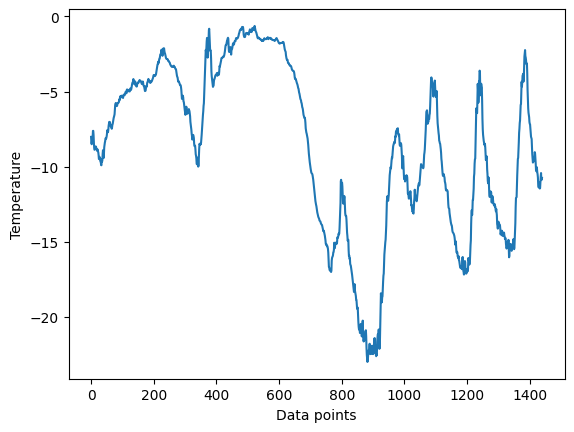

In [ ]:
pl.plot(range(1440), _tmp[:1440])
pl.xlabel('Data points')
pl.ylabel('Temperature')


Allocating 50% of the data samples for training and 25% for validation.


In [ ]:
train_smplno = int(0.5 * len(_data_rw))
smplno_val_ = int(0.25 * len(_data_rw))
test_smplno = len(_data_rw) - train_smplno - smplno_val_
print("number_train_samples:", train_smplno)
print("number_val_samples:", smplno_val_)
print("number_test_samples:", test_smplno)


number_train_samples: 210226
number_val_samples: 105113
number_test_samples: 105113


Preparing the data


Normalizing the data does not require vectorization as it is already numerically represented. Normalize all variables to account for varying data scales, such as temperature (-20 to +30) and pressure (millibars).



In [ ]:
m_mean = _data_rw[:train_smplno].mean(axis=0)
_data_rw -= m_mean
dts = _data_rw[:train_smplno].std(axis=0)
_data_rw /= dts


In [ ]:
import numpy as np
from tensorflow import keras

seq_num = np.arange(10)
data_set_dum_ = keras.utils.timeseries_dataset_from_array(
    data=seq_num[:-3],
    targets=seq_num[3:],
    sequence_length=3,
    batch_size=2,
)

for input_data, target_data in data_set_dum_:
    for a in range(input_data.shape[0]):
        print([int(x) for x in input_data[a]], int(target_data[a]))


[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


Training, validation, and testing datasets require instantiation due to their significant redundancy. Allocating memory for each sample individually would be inefficient. As a result, we decided to generate the samples dynamically.


In [ ]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

_data_train = keras.utils.timeseries_dataset_from_array(
    _data_rw[:-delay],
    targets=_tmp[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=train_smplno
)

_data_val = keras.utils.timeseries_dataset_from_array(
    _data_rw[:-delay],
    targets=_tmp[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=train_smplno,
    end_index=train_smplno + smplno_val_
)

_data_test = keras.utils.timeseries_dataset_from_array(
    _data_rw[:-delay],
    targets=_tmp[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=train_smplno + smplno_val_
)

Examining the output of one of our datasets


In [ ]:
for smpl, trgt in _data_train:
    print("samples shape:", smpl.shape)
    print("targets shape:", trgt.shape)
    break


samples shape: (256, 120, 14)
targets shape: (256,)


A common-sense, non-machine-learning baseline


Computing the commonsense baseline. MAE's "evaluate_naive_method" function provides a baseline for evaluating the effectiveness of simple forecasting methods. This approach predicts the next value in the input sequence based on the last value.



In [ ]:
def naive_method_eval(data_set):
    abs_total_err = 0.
    samples_seen = 0
    for smpl, trgt in data_set:
        preds = smpl[:, -1, 1] * dts[1] + m_mean[1]
        abs_total_err += np.sum(np.abs(preds - trgt))
        samples_seen += smpl.shape[0]
    return abs_total_err / samples_seen

print(f"Validation MAE: {naive_method_eval(_data_val):.2f}")
print(f"Test MAE: {naive_method_eval(_data_test):.2f}")



Validation MAE: 2.44
Test MAE: 2.62


Predicting that the temperature in the next 24 hours will be similar to the current temperature is a reasonable baseline strategy. The Mean Absolute Error (MAE) for testing is 2.62 degrees Celsius, whereas for validation, it is 2.44 degrees Celsius using a simple baseline.
Assuming a constant temperature would result in an average variance of approximately 2.5 degrees.



A basic machine-learning model - Dense Layer


Training and assessing a model with densely connected layers.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

ipt = keras.Input(shape=(sequence_length, _data_rw.shape[-1]))
z = layers.Flatten()(ipt)
z = layers.Dense(16, activation="relu")(z)
oput = layers.Dense(1)(z)
mdl = keras.Model(inputs=ipt, outputs=oput)


In [ ]:
call_back = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras", save_best_only=True)
]

In [ ]:
mdl.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])


In [ ]:
_hist = mdl.fit(_data_train, epochs=10,
                 validation_data=_data_val, callbacks=call_back)


Epoch 1/10
819/819 [==============================] - 60s 72ms/step - loss: 15.0011 - mae: 2.9795 - val_loss: 11.6352 - val_mae: 2.6707
Epoch 2/10
819/819 [==============================] - 56s 68ms/step - loss: 9.6163 - mae: 2.4418 - val_loss: 11.7398 - val_mae: 2.6973
Epoch 3/10
819/819 [==============================] - 56s 68ms/step - loss: 8.6835 - mae: 2.3227 - val_loss: 10.2842 - val_mae: 2.5111
Epoch 4/10
819/819 [==============================] - 58s 70ms/step - loss: 8.1361 - mae: 2.2463 - val_loss: 10.2302 - val_mae: 2.5111
Epoch 5/10
819/819 [==============================] - 57s 70ms/step - loss: 7.7366 - mae: 2.1928 - val_loss: 10.1620 - val_mae: 2.4981
Epoch 6/10
819/819 [==============================] - 55s 67ms/step - loss: 7.4482 - mae: 2.1520 - val_loss: 10.3488 - val_mae: 2.5244
Epoch 7/10
819/819 [==============================] - 56s 68ms/step - loss: 7.1960 - mae: 2.1152 - val_loss: 11.0199 - val_mae: 2.6067
Epoch 8/10
819/819 [==============================] - 

In [ ]:
mdl = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {mdl.evaluate(_data_test)[1]:.2f}")


405/405 [==============================] - 17s 42ms/step - loss: 11.1806 - mae: 2.6234
Test MAE: 2.62


Plotting the results


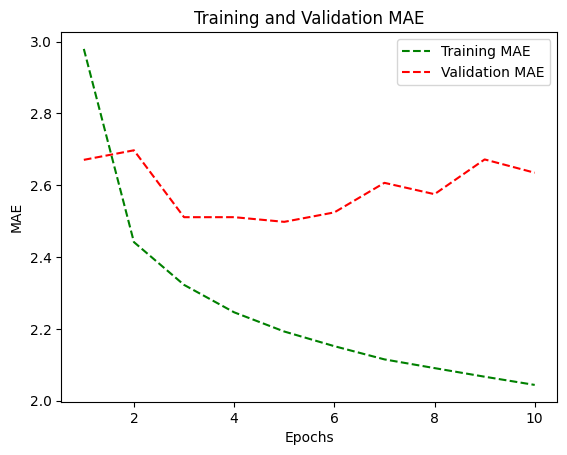

In [ ]:
import matplotlib.pyplot as pl

_mealoss = _hist.history["mae"]
meaval_loss = _hist.history["val_mae"]
_epochs = range(1, len(_mealoss) + 1)

pl.figure()
pl.plot(_epochs, _mealoss, color="green", linestyle="dashed", label="Training MAE")
pl.plot(_epochs, meaval_loss, color="red", linestyle="dashed", label="Validation MAE")
pl.title("Training and Validation MAE")
pl.xlabel("Epochs")
pl.ylabel("MAE")
pl.legend()
pl.show()


1-dimensional convolutional model.

In [ ]:
ipt = keras.Input(shape=(sequence_length, _data_rw.shape[-1]))
c = layers.Conv1D(8, 24, activation="relu")(ipt)
c = layers.MaxPooling1D(2)(c)
c = layers.Conv1D(8, 12, activation="relu")(c)
c = layers.MaxPooling1D(2)(c)
c = layers.Conv1D(8, 6, activation="relu")(c)
c = layers.GlobalAveragePooling1D()(c)
oput = layers.Dense(1)(c)

mdl = keras.Model(inputs=ipt, outputs=oput)

call_back = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras", save_best_only=True)
]

mdl.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

_hist = mdl.fit(_data_train,
                 epochs=10,
                 validation_data=_data_val,
                 callbacks=call_back)

mdl = keras.models.load_model("jena_conv.keras")
print(f"Test MAE: {mdl.evaluate(_data_test)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 98s 118ms/step - loss: 22.1592 - mae: 3.6722 - val_loss: 17.0418 - val_mae: 3.2473
Epoch 2/10
819/819 [==============================] - 94s 114ms/step - loss: 15.7089 - mae: 3.1412 - val_loss: 16.1453 - val_mae: 3.1908
Epoch 3/10
819/819 [==============================] - 99s 121ms/step - loss: 14.6279 - mae: 3.0310 - val_loss: 17.3823 - val_mae: 3.3019
Epoch 4/10
819/819 [==============================] - 96s 116ms/step - loss: 13.8178 - mae: 2.9444 - val_loss: 15.7597 - val_mae: 3.1354
Epoch 5/10
819/819 [==============================] - 97s 118ms/step - loss: 13.2676 - mae: 2.8822 - val_loss: 14.8481 - val_mae: 3.0431
Epoch 6/10
819/819 [==============================] - 97s 119ms/step - loss: 12.8084 - mae: 2.8312 - val_loss: 14.8385 - val_mae: 3.0451
Epoch 7/10
819/819 [==============================] - 98s 120ms/step - loss: 12.4113 - mae: 2.7870 - val_loss: 15.5366 - val_mae: 3.1109
Epoch 8/10
819/819 [=====================

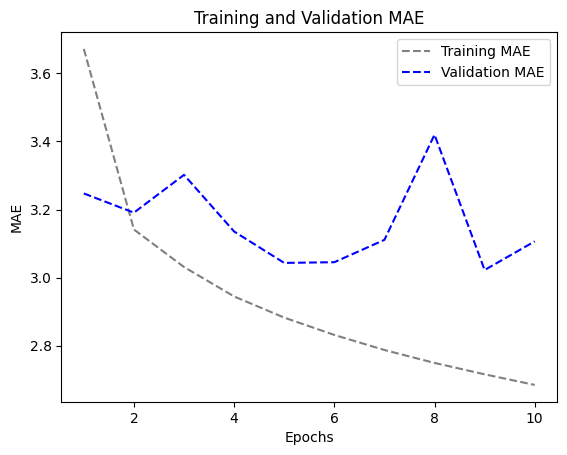

In [ ]:
import matplotlib.pyplot as pl

mae_loss = _hist.history["mae"]
val_mae_loss = _hist.history["val_mae"]
epochs = range(1, len(mae_loss) + 1)

pl.figure()
pl.plot(epochs, mae_loss, color="grey", linestyle="dashed", label="Training MAE")
pl.plot(epochs, val_mae_loss, color="blue", linestyle="dashed", label="Validation MAE")
pl.title("Training and Validation MAE")
pl.xlabel("Epochs")
pl.ylabel("MAE")
pl.legend()
pl.show()


The convolutional model performs poorly compared to the plain or densely connected models. This may be attributable to two key factors:
The premise of translation invariance does not fit well with weather data.
The data must be presented in sequential sequence. Recent data is more accurate in projecting the following day's temperature than older data.
Unfortunately, a 1D convolutional neural network cannot accurately represent the significant temporal order.



A Simple RNN


1.An RNN layer that can process sequences of any length


In [ ]:
no_features = 14
ipt = keras.Input(shape=(None, no_features))
oput = layers.SimpleRNN(16)(ipt)
mdl = keras.Model(inputs=ipt, outputs=oput)

call_back = [
    keras.callbacks.ModelCheckpoint("jena_SimRNN.keras", save_best_only=True)
]

mdl.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
_hist = mdl.fit(
    _data_train,
    epochs=10,
    validation_data=_data_val,
    callbacks=call_back
)

mdl = keras.models.load_model("jena_SimRNN.keras")
print(f"Test MAE: {mdl.evaluate(_data_test)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 83s 99ms/step - loss: 139.0086 - mae: 9.7247 - val_loss: 144.1933 - val_mae: 9.9215
Epoch 2/10
819/819 [==============================] - 79s 96ms/step - loss: 136.6189 - mae: 9.5813 - val_loss: 143.8224 - val_mae: 9.8839
Epoch 3/10
819/819 [==============================] - 81s 98ms/step - loss: 136.3538 - mae: 9.5576 - val_loss: 143.6955 - val_mae: 9.8707
Epoch 4/10
819/819 [==============================] - 79s 96ms/step - loss: 136.2629 - mae: 9.5509 - val_loss: 143.6280 - val_mae: 9.8616
Epoch 5/10
819/819 [==============================] - 84s 102ms/step - loss: 136.1688 - mae: 9.5395 - val_loss: 143.5436 - val_mae: 9.8507
Epoch 6/10
819/819 [==============================] - 83s 101ms/step - loss: 136.1340 - mae: 9.5359 - val_loss: 143.5262 - val_mae: 9.8476
Epoch 7/10
819/819 [==============================] - 80s 97ms/step - loss: 136.1154 - mae: 9.5334 - val_loss: 143.6283 - val_mae: 9.8671
Epoch 8/10
819/819 [============

2.Simple RNN - Stacking RNN layers

In [ ]:
no_features = 14
steps = 120
ipt = keras.Input(shape=(steps, no_features))
x = layers.SimpleRNN(16, return_sequences=True)(ipt)
x = layers.SimpleRNN(16, return_sequences=True)(x)
oput = layers.SimpleRNN(16)(x)

mdl = keras.Model(inputs=ipt, outputs=oput)

call_back = [
    keras.callbacks.ModelCheckpoint("jena_SRNN2.keras", save_best_only=True)
]

mdl.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
_hist = mdl.fit(
    _data_train,
    epochs=10,
    validation_data=_data_val,
    callbacks=call_back
)

mdl = keras.models.load_model("jena_SRNN2.keras")
print(f"Test MAE: {mdl.evaluate(_data_test)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 166s 199ms/step - loss: 136.6710 - mae: 9.5553 - val_loss: 143.4803 - val_mae: 9.8464
Epoch 2/10
819/819 [==============================] - 160s 194ms/step - loss: 135.9338 - mae: 9.5106 - val_loss: 143.4525 - val_mae: 9.8456
Epoch 3/10
819/819 [==============================] - 148s 180ms/step - loss: 135.8950 - mae: 9.5053 - val_loss: 143.4100 - val_mae: 9.8380
Epoch 4/10
819/819 [==============================] - 160s 194ms/step - loss: 135.8733 - mae: 9.5025 - val_loss: 143.4618 - val_mae: 9.8450
Epoch 5/10
819/819 [==============================] - 152s 184ms/step - loss: 135.8542 - mae: 9.4999 - val_loss: 143.4145 - val_mae: 9.8389
Epoch 6/10
819/819 [==============================] - 147s 179ms/step - loss: 135.8416 - mae: 9.4970 - val_loss: 143.4496 - val_mae: 9.8413
Epoch 7/10
819/819 [==============================] - 148s 180ms/step - loss: 135.8270 - mae: 9.4948 - val_loss: 143.4732 - val_mae: 9.8437
Epoch 8/10
819/819 [

A Simple GRU (Gated Recurrent Unit)

In [ ]:
ipt = keras.Input(shape=(sequence_length, _data_rw.shape[-1]))
x = layers.GRU(16)(ipt)
oput = layers.Dense(1)(x)

mdl = keras.Model(inputs=ipt, outputs=oput)

call_back = [
    keras.callbacks.ModelCheckpoint("jena_gru.keras", save_best_only=True)
]

mdl.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
_hist = mdl.fit(
    _data_train,
    epochs=10,
    validation_data=_data_val,
    callbacks=call_back
)

mdl = keras.models.load_model("jena_gru.keras")
print(f"Test MAE: {mdl.evaluate(_data_test)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 130s 155ms/step - loss: 40.2462 - mae: 4.6011 - val_loss: 12.5450 - val_mae: 2.6652
Epoch 2/10
819/819 [==============================] - 129s 157ms/step - loss: 10.5543 - mae: 2.5278 - val_loss: 9.5622 - val_mae: 2.3939
Epoch 3/10
819/819 [==============================] - 127s 155ms/step - loss: 9.5442 - mae: 2.4112 - val_loss: 9.5993 - val_mae: 2.3911
Epoch 4/10
819/819 [==============================] - 128s 156ms/step - loss: 9.2025 - mae: 2.3653 - val_loss: 9.6630 - val_mae: 2.3977
Epoch 5/10
819/819 [==============================] - 142s 173ms/step - loss: 8.9700 - mae: 2.3362 - val_loss: 9.2687 - val_mae: 2.3554
Epoch 6/10
819/819 [==============================] - 126s 154ms/step - loss: 8.7278 - mae: 2.3080 - val_loss: 9.6047 - val_mae: 2.3889
Epoch 7/10
819/819 [==============================] - 143s 174ms/step - loss: 8.5266 - mae: 2.2806 - val_loss: 9.5691 - val_mae: 2.3941
Epoch 8/10
819/819 [=========================

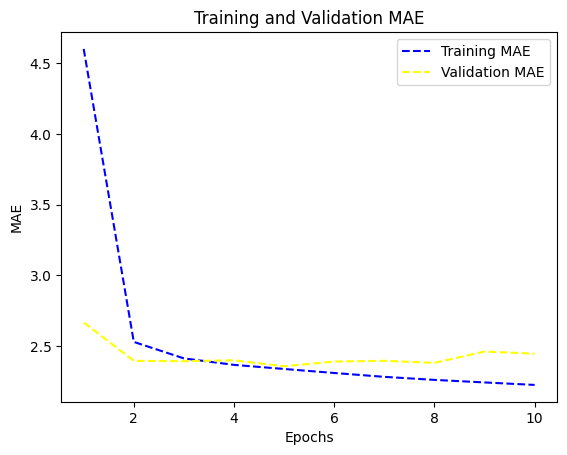

In [ ]:
import matplotlib.pyplot as pl

_loss = _hist.history["mae"]
val_loss = _hist.history["val_mae"]
epochs = range(1, len(_loss) + 1)

pl.figure()
pl.plot(epochs, _loss, color="blue", linestyle="dashed", label="Training MAE")
pl.plot(epochs, val_loss, color="yellow", linestyle="dashed", label="Validation MAE")
pl.title("Training and Validation MAE")
pl.xlabel("Epochs")
pl.ylabel("MAE")
pl.legend()
pl.show()


LSTM(Long Short-Term Memory )

1.LSTM-Simple

In [ ]:
ipt = keras.Input(shape=(sequence_length, _data_rw.shape[-1]))
c = layers.LSTM(16)(ipt)
oput = layers.Dense(1)(c)
mdl = keras.Model(inputs=ipt, outputs=oput)

call_back = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras", save_best_only=True)
]

mdl.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

_hist = mdl.fit(
    _data_train,
    epochs=10,
    validation_data=_data_val,
    callbacks=call_back
)

mdl = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {mdl.evaluate(_data_test)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 129s 155ms/step - loss: 40.0911 - mae: 4.5899 - val_loss: 12.2674 - val_mae: 2.6645
Epoch 2/10
819/819 [==============================] - 128s 156ms/step - loss: 10.8017 - mae: 2.5524 - val_loss: 9.6756 - val_mae: 2.4232
Epoch 3/10
819/819 [==============================] - 127s 155ms/step - loss: 9.6740 - mae: 2.4194 - val_loss: 9.9973 - val_mae: 2.4556
Epoch 4/10
819/819 [==============================] - 126s 154ms/step - loss: 9.3008 - mae: 2.3688 - val_loss: 9.7721 - val_mae: 2.4416
Epoch 5/10
819/819 [==============================] - 145s 176ms/step - loss: 9.0592 - mae: 2.3359 - val_loss: 9.3845 - val_mae: 2.3962
Epoch 6/10
819/819 [==============================] - 127s 155ms/step - loss: 8.8175 - mae: 2.3012 - val_loss: 9.9891 - val_mae: 2.4557
Epoch 7/10
819/819 [==============================] - 128s 156ms/step - loss: 8.6086 - mae: 2.2716 - val_loss: 9.7577 - val_mae: 2.4531
Epoch 8/10
819/819 [=========================

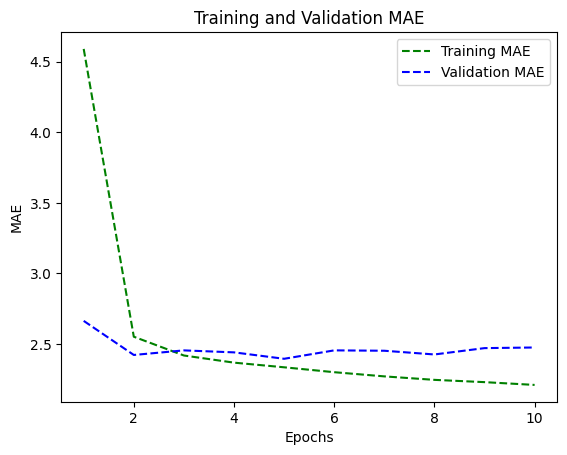

In [ ]:
import matplotlib.pyplot as pl

mae_loss = _hist.history["mae"]
val_mae_loss = _hist.history["val_mae"]
_epochs = range(1, len(mae_loss) + 1)

pl.figure()
pl.plot(_epochs, mae_loss, color="green", linestyle="dashed", label="Training MAE")
pl.plot(_epochs, val_mae_loss, color="blue", linestyle="dashed", label="Validation MAE")
pl.title("Training and Validation MAE")
pl.xlabel("Epochs")
pl.ylabel("MAE")
pl.legend()
pl.show()


2.LSTM - dropout Regularization


In [ ]:
ipt = keras.Input(shape=(sequence_length, _data_rw.shape[-1]))
z = layers.LSTM(16, recurrent_dropout=0.25)(ipt)
z = layers.Dropout(0.5)(z)
oput = layers.Dense(1)(z)
mdl = keras.Model(inputs=ipt, outputs=oput)

call_back = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras", save_best_only=True)
]

mdl.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

_hist = mdl.fit(
    _data_train,
    epochs=10,
    validation_data=_data_val,
    callbacks=call_back
)

mdl = keras.models.load_model("jena_lstm_dropout.keras")
print(f"Test MAE: {mdl.evaluate(_data_test)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 202s 243ms/step - loss: 43.1503 - mae: 4.8991 - val_loss: 12.6071 - val_mae: 2.6916
Epoch 2/10
819/819 [==============================] - 198s 242ms/step - loss: 19.6708 - mae: 3.4069 - val_loss: 10.2097 - val_mae: 2.4840
Epoch 3/10
819/819 [==============================] - 199s 242ms/step - loss: 18.0522 - mae: 3.2693 - val_loss: 9.6750 - val_mae: 2.4251
Epoch 4/10
819/819 [==============================] - 201s 245ms/step - loss: 17.3478 - mae: 3.2040 - val_loss: 9.7652 - val_mae: 2.4379
Epoch 5/10
819/819 [==============================] - 197s 240ms/step - loss: 16.6766 - mae: 3.1419 - val_loss: 9.4201 - val_mae: 2.3987
Epoch 6/10
819/819 [==============================] - 210s 257ms/step - loss: 16.2164 - mae: 3.1009 - val_loss: 9.7135 - val_mae: 2.4273
Epoch 7/10
819/819 [==============================] - 199s 243ms/step - loss: 15.7695 - mae: 3.0579 - val_loss: 9.2628 - val_mae: 2.3740
Epoch 8/10
819/819 [===================

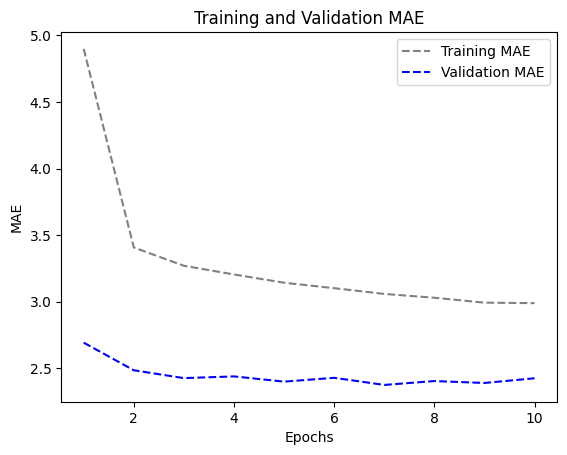

In [ ]:
import matplotlib.pyplot as pl
lossOfAValue = _hist.history["mae"]
val_loss = _hist.history["val_mae"]
epochs = range(1, len(lossOfAValue) + 1)
pl.figure()
pl.plot(epochs, lossOfAValue, color="grey", linestyle="dashed", label="Training MAE")
pl.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation MAE")
pl.title("Training and Validation MAE")
pl.xlabel("Epochs")
pl.ylabel("MAE")
pl.legend()
pl.show()


3.LSTM - Stacked setup with 16 units

In [ ]:
inputs = keras.Input(shape=(sequence_length, _data_rw.shape[-1]))
g = layers.LSTM(16, return_sequences=True)(inputs)
g = layers.LSTM(16)(g)
outputs = layers.Dense(1)(g)
model = keras.Model(inputs, outputs)
call_back = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked1.keras", save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(_data_train, epochs=10, validation_data=_data_val, callbacks=call_back)
model = keras.models.load_model("jena_LSTM_stacked1.keras")
print(f"Test MAE: {model.evaluate(_data_test)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 218s 261ms/step - loss: 42.4038 - mae: 4.7229 - val_loss: 13.0307 - val_mae: 2.7297
Epoch 2/10
819/819 [==============================] - 220s 268ms/step - loss: 10.5165 - mae: 2.5075 - val_loss: 9.8348 - val_mae: 2.4479
Epoch 3/10
819/819 [==============================] - 211s 258ms/step - loss: 9.0596 - mae: 2.3377 - val_loss: 9.9393 - val_mae: 2.4571
Epoch 4/10
819/819 [==============================] - 211s 257ms/step - loss: 8.4083 - mae: 2.2515 - val_loss: 10.1694 - val_mae: 2.4870
Epoch 5/10
819/819 [==============================] - 212s 259ms/step - loss: 7.9149 - mae: 2.1843 - val_loss: 10.3626 - val_mae: 2.5070
Epoch 6/10
819/819 [==============================] - 214s 261ms/step - loss: 7.5239 - mae: 2.1300 - val_loss: 10.9116 - val_mae: 2.5589
Epoch 7/10
819/819 [==============================] - 217s 264ms/step - loss: 7.1793 - mae: 2.0798 - val_loss: 10.7814 - val_mae: 2.5654
Epoch 8/10
819/819 [=====================

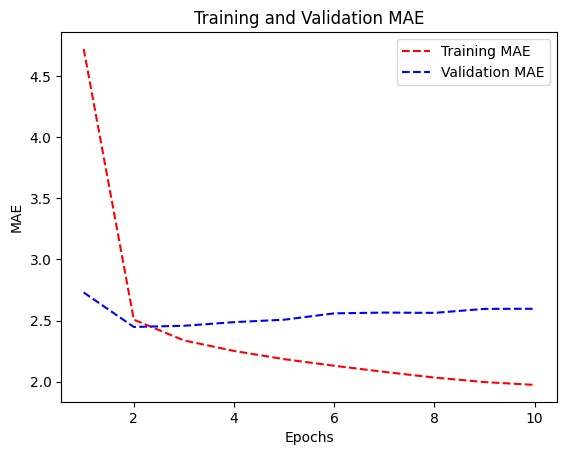

In [ ]:
import matplotlib.pyplot as pl

lossOfAValue = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(lossOfAValue) + 1)

pl.figure()
pl.plot(epochs, lossOfAValue, color="red", linestyle="dashed", label="Training MAE")
pl.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation MAE")
pl.title("Training and Validation MAE")
pl.xlabel("Epochs")
pl.ylabel("MAE")
pl.legend()
pl.show()


4.LSTM - Stacked setup with 32 units


In [ ]:
ipt = keras.Input(shape=(sequence_length, _data_rw.shape[-1]))
g = layers.LSTM(32, return_sequences=True)(ipt)
g = layers.LSTM(32)(g)
oput = layers.Dense(1)(g)
mdl = keras.Model(inputs=ipt, outputs=oput)

call_back = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked2.keras", save_best_only=True)
]

mdl.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
_hist = mdl.fit(_data_train, epochs=10, validation_data=_data_val, callbacks=call_back)
mdl = keras.models.load_model("jena_LSTM_stacked2.keras")
print(f"Test MAE: {mdl.evaluate(_data_test)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 301s 362ms/step - loss: 20.1660 - mae: 3.2334 - val_loss: 10.2911 - val_mae: 2.4965
Epoch 2/10
819/819 [==============================] - 298s 364ms/step - loss: 7.9051 - mae: 2.1878 - val_loss: 10.5933 - val_mae: 2.5653
Epoch 3/10
819/819 [==============================] - 328s 400ms/step - loss: 6.2703 - mae: 1.9305 - val_loss: 12.1162 - val_mae: 2.7370
Epoch 4/10
819/819 [==============================] - 301s 368ms/step - loss: 5.2346 - mae: 1.7638 - val_loss: 11.9459 - val_mae: 2.7168
Epoch 5/10
819/819 [==============================] - 300s 366ms/step - loss: 4.5192 - mae: 1.6373 - val_loss: 12.1310 - val_mae: 2.7464
Epoch 6/10
819/819 [==============================] - 301s 368ms/step - loss: 4.0510 - mae: 1.5439 - val_loss: 13.1463 - val_mae: 2.8241
Epoch 7/10
819/819 [==============================] - 304s 371ms/step - loss: 3.5775 - mae: 1.4512 - val_loss: 13.5602 - val_mae: 2.8828
Epoch 8/10
819/819 [====================

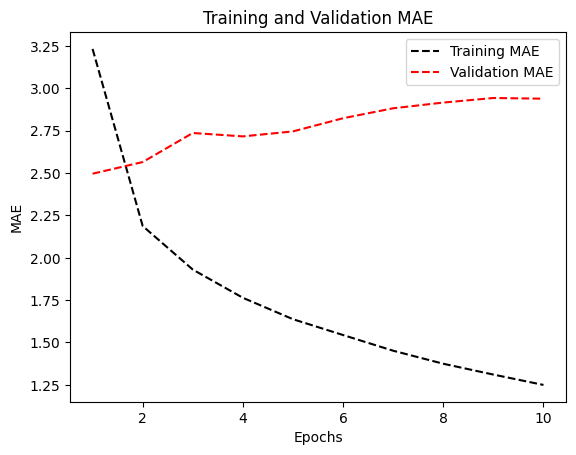

In [ ]:
import matplotlib.pyplot as pl

aValOfLoss = _hist.history["mae"]
lossValue = _hist.history["val_mae"]
epochs = range(1, len(aValOfLoss) + 1)

pl.figure()
pl.plot(epochs, aValOfLoss, color="black", linestyle="dashed", label="Training MAE")
pl.plot(epochs, lossValue, color="red", linestyle="dashed", label="Validation MAE")
pl.title("Training and Validation MAE")
pl.xlabel("Epochs")
pl.ylabel("MAE")
pl.legend()
pl.show()


5.LSTM - Stacked setup with 8 units

In [ ]:
ipt = keras.Input(shape=(sequence_length, _data_rw.shape[-1]))
g = layers.LSTM(8, return_sequences=True)(ipt)
g = layers.LSTM(8)(g)
oput = layers.Dense(1)(g)
mdl = keras.Model(inputs=ipt, outputs=oput)

call_back = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked3.keras", save_best_only=True)
]
mdl.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

_hist = mdl.fit(
    _data_train,
    epochs=10,
    validation_data=_data_val,
    callbacks=call_back
)

mdl = keras.models.load_model("jena_LSTM_stacked3.keras")
print(f"Test MAE: {mdl.evaluate(_data_test)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 179s 212ms/step - loss: 71.7629 - mae: 6.5048 - val_loss: 36.9156 - val_mae: 4.5457
Epoch 2/10
819/819 [==============================] - 179s 218ms/step - loss: 22.1228 - mae: 3.4822 - val_loss: 13.1955 - val_mae: 2.7271
Epoch 3/10
819/819 [==============================] - 175s 213ms/step - loss: 11.6104 - mae: 2.6349 - val_loss: 9.7958 - val_mae: 2.4248
Epoch 4/10
819/819 [==============================] - 178s 217ms/step - loss: 10.0945 - mae: 2.4752 - val_loss: 9.6363 - val_mae: 2.4337
Epoch 5/10
819/819 [==============================] - 177s 216ms/step - loss: 9.5732 - mae: 2.4128 - val_loss: 9.9132 - val_mae: 2.4458
Epoch 6/10
819/819 [==============================] - 174s 212ms/step - loss: 9.3060 - mae: 2.3778 - val_loss: 9.5776 - val_mae: 2.4157
Epoch 7/10
819/819 [==============================] - 173s 210ms/step - loss: 9.1254 - mae: 2.3527 - val_loss: 9.3648 - val_mae: 2.3882
Epoch 8/10
819/819 [======================

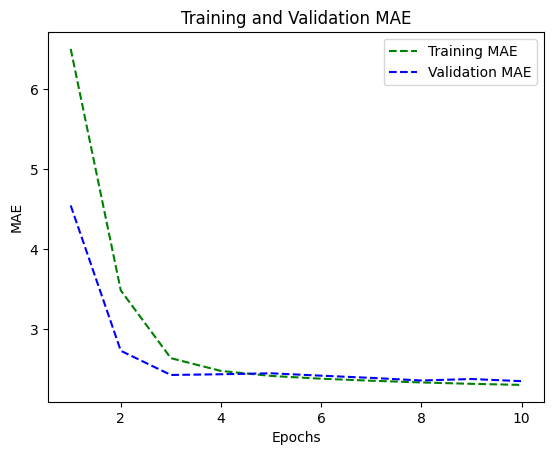

In [ ]:
import matplotlib.pyplot as pl

aValOfLoss = _hist.history["mae"]
lossValue = _hist.history["val_mae"]
epochs = range(1, len(aValOfLoss) + 1)

pl.figure()
pl.plot(epochs, aValOfLoss, color="green", linestyle="dashed", label="Training MAE")
pl.plot(epochs, lossValue, color="blue", linestyle="dashed", label="Validation MAE")
pl.title("Training and Validation MAE")
pl.xlabel("Epochs")
pl.ylabel("MAE")
pl.legend()
pl.show()


6.LSTM - dropout-regularized, stacked model

In [ ]:
ipt = keras.Input(shape=(sequence_length, _data_rw.shape[-1]))
g = layers.LSTM(8, recurrent_dropout=0.5, return_sequences=True)(ipt)
g = layers.LSTM(8, recurrent_dropout=0.5)(g)
g = layers.Dropout(0.5)(g)
oput = layers.Dense(1)(g)
mdl = keras.Model(inputs=ipt, outputs=oput)

call_back = [
    keras.callbacks.ModelCheckpoint("jena_stacked_LSTM_dropout.keras", save_best_only=True)
]

mdl.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
_hist = mdl.fit(_data_train, epochs=10, validation_data=_data_val, callbacks=call_back)
mdl = keras.models.load_model("jena_stacked_LSTM_dropout.keras")
print(f"Test MAE: {mdl.evaluate(_data_test)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 328s 392ms/step - loss: 75.5222 - mae: 6.6810 - val_loss: 35.1793 - val_mae: 4.4047
Epoch 2/10
819/819 [==============================] - 332s 405ms/step - loss: 31.9332 - mae: 4.2252 - val_loss: 14.1115 - val_mae: 2.8006
Epoch 3/10
819/819 [==============================] - 309s 377ms/step - loss: 24.5742 - mae: 3.7439 - val_loss: 11.3580 - val_mae: 2.5742
Epoch 4/10
819/819 [==============================] - 310s 379ms/step - loss: 22.4236 - mae: 3.5897 - val_loss: 10.4919 - val_mae: 2.4979
Epoch 5/10
819/819 [==============================] - 312s 381ms/step - loss: 21.3305 - mae: 3.5036 - val_loss: 10.3086 - val_mae: 2.4875
Epoch 6/10
819/819 [==============================] - 308s 376ms/step - loss: 20.3117 - mae: 3.4219 - val_loss: 9.9048 - val_mae: 2.4432
Epoch 7/10
819/819 [==============================] - 320s 390ms/step - loss: 19.5524 - mae: 3.3607 - val_loss: 9.8624 - val_mae: 2.4377
Epoch 8/10
819/819 [================

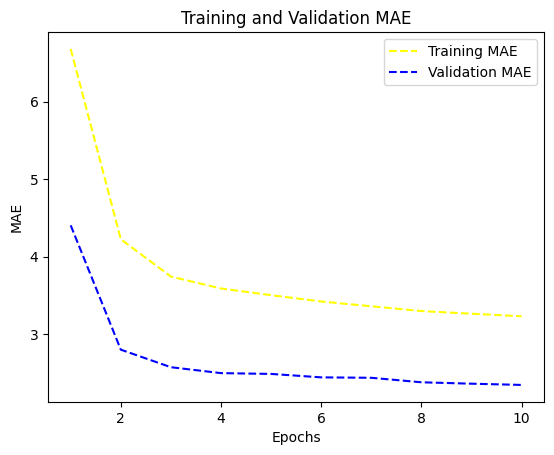

In [ ]:
import matplotlib.pyplot as pl

lossOfAValue = _hist.history["mae"]
lossValue = _hist.history["val_mae"]
epochs = range(1, len(lossOfAValue) + 1)

pl.figure()
pl.plot(epochs, lossOfAValue, color="yellow", linestyle="dashed", label="Training MAE")
pl.plot(epochs, lossValue, color="blue", linestyle="dashed", label="Validation MAE")
pl.title("Training and Validation MAE")
pl.xlabel("Epochs")
pl.ylabel("MAE")
pl.legend()
pl.show()


Bidirectional LSTM

In [ ]:
ipt = keras.Input(shape=(sequence_length, _data_rw.shape[-1]))
g = layers.Bidirectional(layers.LSTM(16))(ipt)
oput = layers.Dense(1)(g)
model = keras.Model(ipt, oput)

call_back = [
    keras.callbacks.ModelCheckpoint("jena_bidirec_LSTM.keras", save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(_data_train, epochs=5, validation_data=_data_val, callbacks=call_back)
model = keras.models.load_model("jena_bidirec_LSTM.keras")
print(f"Test MAE: {model.evaluate(_data_test)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 191s 227ms/step - loss: 29.5052 - mae: 3.8902 - val_loss: 10.4796 - val_mae: 2.5085
Epoch 2/10
819/819 [==============================] - 187s 228ms/step - loss: 9.6409 - mae: 2.4211 - val_loss: 9.6615 - val_mae: 2.4114
Epoch 3/10
819/819 [==============================] - 185s 225ms/step - loss: 8.6863 - mae: 2.2976 - val_loss: 10.0743 - val_mae: 2.4628
Epoch 4/10
819/819 [==============================] - 199s 243ms/step - loss: 8.1843 - mae: 2.2257 - val_loss: 9.6763 - val_mae: 2.4263
Epoch 5/10
819/819 [==============================] - 186s 226ms/step - loss: 7.7780 - mae: 2.1668 - val_loss: 10.6365 - val_mae: 2.5336
Epoch 6/10
819/819 [==============================] - 184s 224ms/step - loss: 7.4716 - mae: 2.1235 - val_loss: 10.8579 - val_mae: 2.5689
Epoch 7/10
819/819 [==============================] - 187s 227ms/step - loss: 7.2042 - mae: 2.0839 - val_loss: 10.6708 - val_mae: 2.5510
Epoch 8/10
819/819 [======================

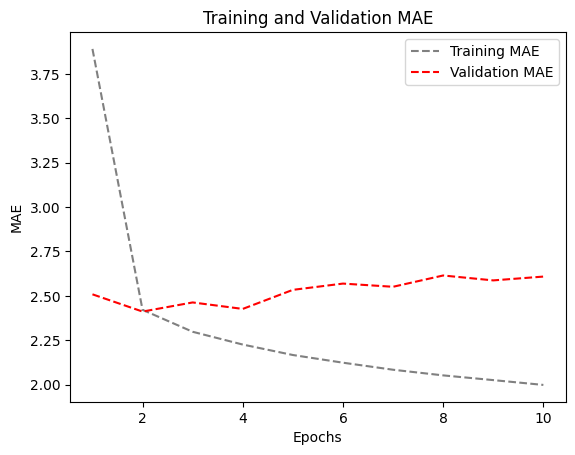

In [ ]:
import matplotlib.pyplot as pl

lossOfAValue = history.history["mae"]
lossValue = history.history["val_mae"]
epochs = range(1, len(lossOfAValue) + 1)

pl.figure()
pl.plot(epochs, lossOfAValue, color="grey", linestyle="dashed", label="Training MAE")
pl.plot(epochs, lossValue, color="red", linestyle="dashed", label="Validation MAE")
pl.title("Training and Validation MAE")
pl.xlabel("Epochs")
pl.ylabel("MAE")
pl.legend()
pl.show()


1D Convnets and LSTM together

In [43]:
inputs = keras.Input(shape=(sequence_length, _data_rw.shape[-1]))
y = layers.Conv1D(64, 3, activation='relu')(inputs)
y = layers.MaxPooling1D(3)(y)
y = layers.Conv1D(128, 3, activation='relu')(y)
y = layers.GlobalMaxPooling1D()(y)
y = layers.Reshape((-1, 128))(y)
y = layers.LSTM(16)(y)
oput = layers.Dense(1)(y)

model = keras.Model(inputs, oput)
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

call_back = [
    keras.callbacks.ModelCheckpoint("jena_Conv_LSTM.keras", save_best_only=True)
]

history = model.fit(_data_train, epochs=5, validation_data=_data_val, callbacks=call_back)

model = keras.models.load_model("jena_Conv_LSTM.keras")
print(f"Test MAE: {model.evaluate(_data_test)[1]:.2f}")

Epoch 1/5
819/819 [==============================] - 142s 169ms/step - loss: 46.7711 - mae: 5.1180 - val_loss: 25.2189 - val_mae: 3.8820
Epoch 2/5
819/819 [==============================] - 134s 164ms/step - loss: 17.6751 - mae: 3.2578 - val_loss: 20.9010 - val_mae: 3.6236
Epoch 3/5
819/819 [==============================] - 137s 166ms/step - loss: 14.7167 - mae: 2.9837 - val_loss: 21.0809 - val_mae: 3.6344
Epoch 4/5
819/819 [==============================] - 137s 167ms/step - loss: 13.1137 - mae: 2.8139 - val_loss: 22.7606 - val_mae: 3.8306
Epoch 5/5
405/405 [==============================] - 29s 69ms/step - loss: 22.2369 - mae: 3.7665
Test MAE: 3.77


1d_convnets and RNN

In [44]:
ipt = keras.Input(shape=(sequence_length, _data_rw.shape[-1]))

y = layers.Conv1D(64, kernel_size=3, activation='relu')(ipt)
y = layers.MaxPooling1D(pool_size=2)(y)
y = layers.Conv1D(128, kernel_size=3, activation='relu')(y)
y = layers.MaxPooling1D(pool_size=2)(y)

y = layers.GlobalMaxPooling1D()(y)
y = layers.Reshape((-1, 128))(y)

y = layers.LSTM(16, return_sequences=False)(y)

oput = layers.Dense(1)(y)

mdl = keras.Model(ipt, oput)
mdl.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

call_back = [
    keras.callbacks.ModelCheckpoint("jena_Conv_RNN.keras", save_best_only=True)
]

hist = mdl.fit(_data_train, epochs=10, validation_data=_data_val, callbacks=call_back)

mdl = keras.models.load_model("jena_Conv_RNN.keras")
print(f"Test MAE: {mdl.evaluate(_data_test)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 175s 210ms/step - loss: 52.9232 - mae: 5.4594 - val_loss: 28.3343 - val_mae: 4.1352
Epoch 2/10
819/819 [==============================] - 162s 197ms/step - loss: 18.4774 - mae: 3.3220 - val_loss: 23.0039 - val_mae: 3.8034
Epoch 3/10
819/819 [==============================] - 167s 204ms/step - loss: 15.3610 - mae: 3.0426 - val_loss: 23.6954 - val_mae: 3.9052
Epoch 4/10
819/819 [==============================] - 163s 199ms/step - loss: 13.9118 - mae: 2.8880 - val_loss: 23.9091 - val_mae: 3.9364
Epoch 5/10
819/819 [==============================] - 166s 202ms/step - loss: 12.8072 - mae: 2.7663 - val_loss: 24.8078 - val_mae: 3.9550
Epoch 6/10
819/819 [==============================] - 176s 214ms/step - loss: 12.0108 - mae: 2.6778 - val_loss: 24.0609 - val_mae: 3.9039
Epoch 7/10
819/819 [==============================] - 179s 218ms/step - loss: 11.2896 - mae: 2.5920 - val_loss: 26.2187 - val_mae: 4.1284
Epoch 8/10
819/819 [==============

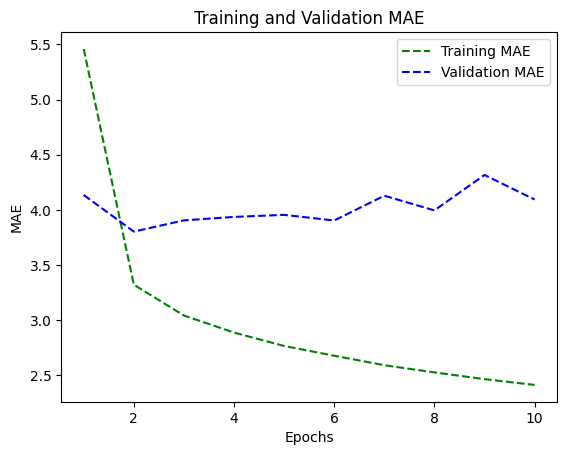

In [45]:
import matplotlib.pyplot as plt

aValOfLoss = hist.history["mae"]
lossValue = hist.history["val_mae"]
epochs = range(1, len(aValOfLoss) + 1)

plt.figure()
plt.plot(epochs, aValOfLoss, color="green", linestyle="dashed", label="Training MAE")
plt.plot(epochs, lossValue, color="blue", linestyle="dashed", label="Validation MAE")
plt.title("Training and Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

We produced fifteen models: The following are the details:
Model 1: commonsense, non-machine learning baseline
Model 2 is a basic machine learning model.
Model 3: one-dimensional convolutional model.
Model 4: A simple RNN layer capable of processing sequences of any length.
Model 5: Simple RNN with stacked RNN layers.
Model 6: Simple GRU (Gated Recurrent Unit)
Model 7: LSTM-simple
Model 8: LSTM with dropout. Regularization
Model 9: Stacked configuration of 16 units
Model 10: Stacked configuration of 32 units
Model 11: Stacked configuration of 8 units
Model 12: LSTM - dropout regularized, layered
Model 13 uses bidirectional LSTM, whereas Model 14 combines 1D convolutions with LSTMs.
Model 15: 1D convolutions and RNN


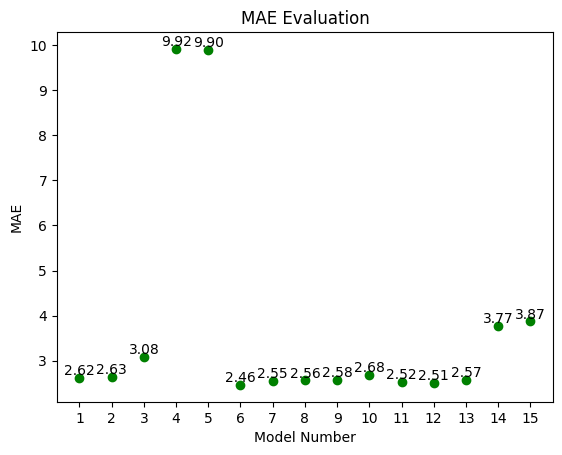

In [46]:
import matplotlib.pyplot as pl

mdl = ("1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15")
Mae = (2.62, 2.63, 3.08, 9.92, 9.9, 2.46, 2.55, 2.56, 2.58, 2.68, 2.52, 2.51, 2.57, 3.77,3.87)

pl.scatter(mdl, Mae, color="green")
pl.title("MAE Evaluation")
pl.xlabel("Model Number")
pl.ylabel("MAE")

for (x, y) in zip(mdl, Mae):
    pl.text(x, y, f"{y:.2f}", va='bottom', ha='center')

pl.show()

**THANK YOU!!**